In [619]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [621]:
Df = pd.read_csv('C:/logistica/heart_cleveland_upload.csv')

Df.head(297)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [623]:
Df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

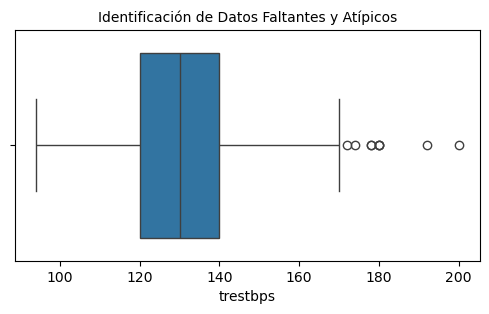

In [625]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Df['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

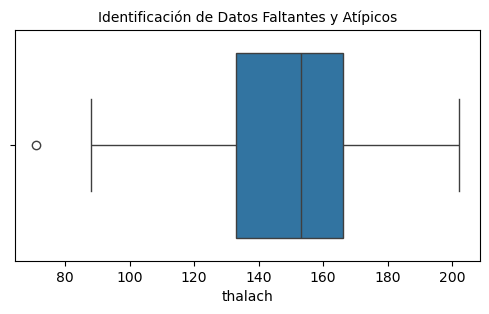

In [627]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Df['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

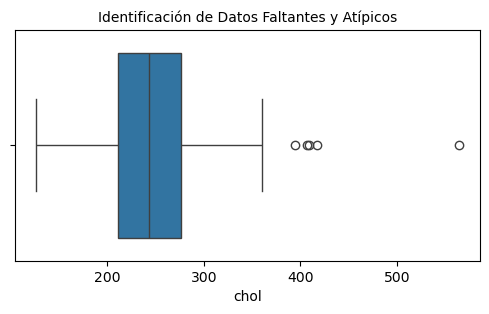

In [629]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Df['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [631]:
print("Cantidad de Registros con cero en Presión Arterial en Reposo: ",Df['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia Cardíaca Máxima Alcanzada: ",Df['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Colestoral Sérico: ",Df['chol'].isin([0]).sum())

Cantidad de Registros con cero en Presión Arterial en Reposo:  0
Cantidad de Registros con cero en Frecuencia Cardíaca Máxima Alcanzada:  0
Cantidad de Registros con cero en Colestoral Sérico:  0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

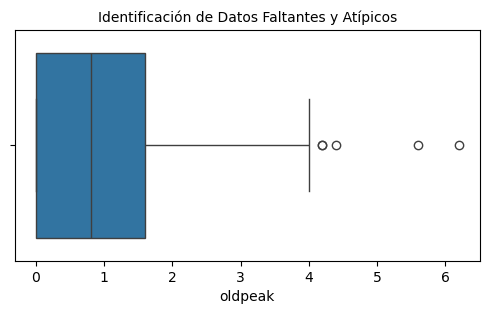

In [633]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Df['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [634]:
nivel_minimo=0
nivel_maximo=1.2
Total_Atipicos=((Df['oldpeak']<nivel_minimo)|(Df['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 104


In [637]:
Df=Df[(Df['oldpeak']<nivel_maximo)&(Df['oldpeak']>nivel_minimo)]

In [639]:
Total_Atipicos=((Df['oldpeak']<nivel_minimo)|(Df['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [641]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 287
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        80 non-null     int64  
 1   sex        80 non-null     int64  
 2   cp         80 non-null     int64  
 3   trestbps   80 non-null     int64  
 4   chol       80 non-null     int64  
 5   fbs        80 non-null     int64  
 6   restecg    80 non-null     int64  
 7   thalach    80 non-null     int64  
 8   exang      80 non-null     int64  
 9   oldpeak    80 non-null     float64
 10  slope      80 non-null     int64  
 11  ca         80 non-null     int64  
 12  thal       80 non-null     int64  
 13  condition  80 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 9.4 KB


In [643]:
Df['condition'].value_counts()

condition
0    51
1    29
Name: count, dtype: int64

In [645]:
X = Df.drop('condition',axis=1)
Y = Df['condition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state= 0)

In [647]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
271   47    1   3       112   204    0        0      143      0      0.1   
51    49    1   1       130   266    0        0      171      0      0.6   
88    64    0   2       140   313    0        0      133      0      0.2   
116   52    0   2       136   196    0        2      169      0      0.1   
83    65    0   2       140   417    1        2      157      0      0.8   
241   55    1   3       160   289    0        2      145      1      0.8   
258   52    1   3       125   212    0        0      168      0      1.0   
12    59    1   0       134   204    0        0      162      0      0.8   
222   58    1   3       100   234    0        0      156      0      0.1   
46    52    1   1       120   325    0        0      172      0      0.2   
173   65    1   3       110   248    0        2      158      0      0.6   
287   42    0   3       102   265    0        2      122      0      0.6   
167   66    

In [649]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
80    67    1   2       152   212    0        2      150      0      0.8   
274   46    1   3       120   249    0        2      144      0      0.8   
85    65    0   2       160   360    0        2      151      0      0.8   
144   42    1   2       120   240    1        0      194      0      0.8   
0     69    1   0       160   234    1        2      131      0      0.1   
224   57    1   3       150   276    0        2      112      1      0.6   
256   52    1   3       108   233    1        0      147      0      0.1   
210   59    1   3       164   176    1        2       90      0      1.0   
103   57    1   2       128   229    0        2      150      0      0.4   
53    48    1   1       130   245    0        2      180      0      0.2   
24    71    0   1       160   302    0        0      162      0      0.4   
107   54    1   2       125   273    0        2      152      0      0.5   
10    59    

In [651]:
X_test.head(297)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
80,67,1,2,152,212,0,2,150,0,0.8,1,0,2
274,46,1,3,120,249,0,2,144,0,0.8,0,0,2
85,65,0,2,160,360,0,2,151,0,0.8,0,0,0
144,42,1,2,120,240,1,0,194,0,0.8,2,0,2
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
224,57,1,3,150,276,0,2,112,1,0.6,1,1,1
256,52,1,3,108,233,1,0,147,0,0.1,0,3,2
210,59,1,3,164,176,1,2,90,0,1.0,1,2,1
103,57,1,2,128,229,0,2,150,0,0.4,1,1,2
53,48,1,1,130,245,0,2,180,0,0.2,1,0,0


In [653]:
regresion = LogisticRegression(solver = "liblinear")
regresion.fit (X_train , Y_train) 
Prediccion = regresion.predict(X_test)

In [655]:
X_test.head(297)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
80,67,1,2,152,212,0,2,150,0,0.8,1,0,2
274,46,1,3,120,249,0,2,144,0,0.8,0,0,2
85,65,0,2,160,360,0,2,151,0,0.8,0,0,0
144,42,1,2,120,240,1,0,194,0,0.8,2,0,2
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
224,57,1,3,150,276,0,2,112,1,0.6,1,1,1
256,52,1,3,108,233,1,0,147,0,0.1,0,3,2
210,59,1,3,164,176,1,2,90,0,1.0,1,2,1
103,57,1,2,128,229,0,2,150,0,0.4,1,1,2
53,48,1,1,130,245,0,2,180,0,0.2,1,0,0


In [657]:
print (Prediccion)

[1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1]


In [659]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.80      0.89      0.84         9

    accuracy                           0.88        24
   macro avg       0.86      0.88      0.87        24
weighted avg       0.88      0.88      0.88        24



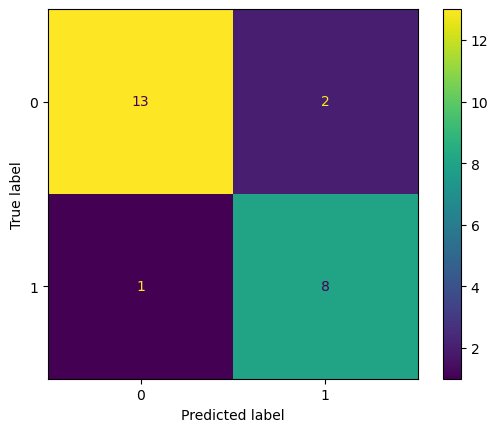

In [661]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

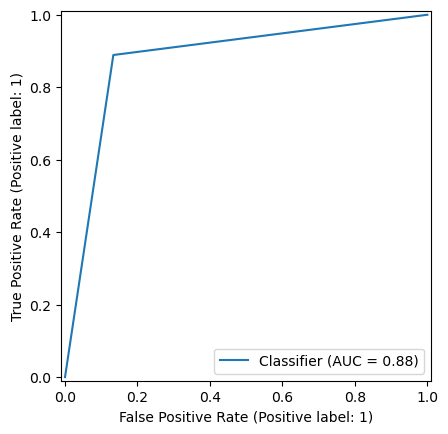

In [663]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

Interpretar, analizar y documentar los resultados obtenidos

La precisión para la clase "condicion" es 0,80, lo que significa que el 80% de los predichos como enfermos por el modelo tenian enfermedad cardiaca.

Aquí el Recall para la clase "condicion" es 0,89, lo que indica que el modelo identificó correctamente al 89% de todos los enfermos.

Aquí la puntuación F1 para la clase "diabética" es  0.84, lo que indica un equilibrio entre precisión y recall.

El AUC es 0,88 lo que significa que el 88% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.